All codes in this demo are adopted from scikit-learn documentation site: https://scikit-learn.org

## Scikit-Learn 1.3.0

[Release Highlights](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_1_3_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-1-3-0-py)

In [1]:
!pip install --upgrade scikit-learn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.6.1.


In [4]:
# HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications with Noise.
from sklearn.cluster import HDBSCAN

In [5]:
# Target Encoder for regression and classification targets.
from sklearn.preprocessing import TargetEncoder

In [6]:
# Validation Curve visualization.
from sklearn.model_selection import ValidationCurveDisplay

## Data Loading

### Loading standard datasets

In [8]:
# import some data to play with
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.feature_names)
iris.data[0:5]

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
print(iris.target.shape)
print(iris.target_names)
iris.target

(150,)
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

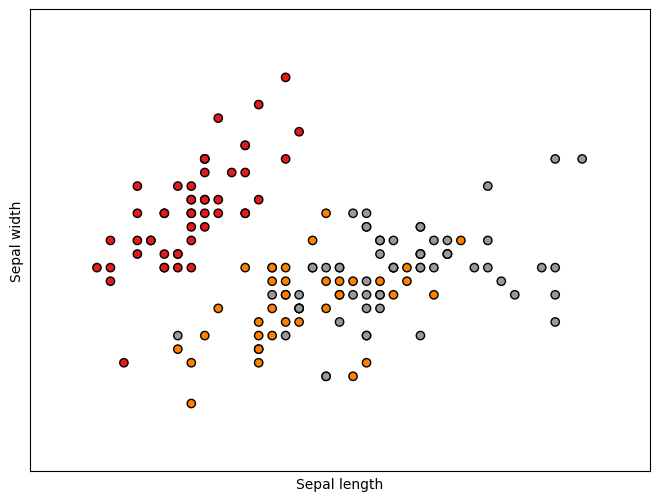

In [11]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [14]:
iris_data = pd.DataFrame( iris.data,
                          columns=iris.feature_names )
iris_data['species'] = iris.target_names[iris.target]
pd.concat([iris_data.head(3), iris_data.tail(3)])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


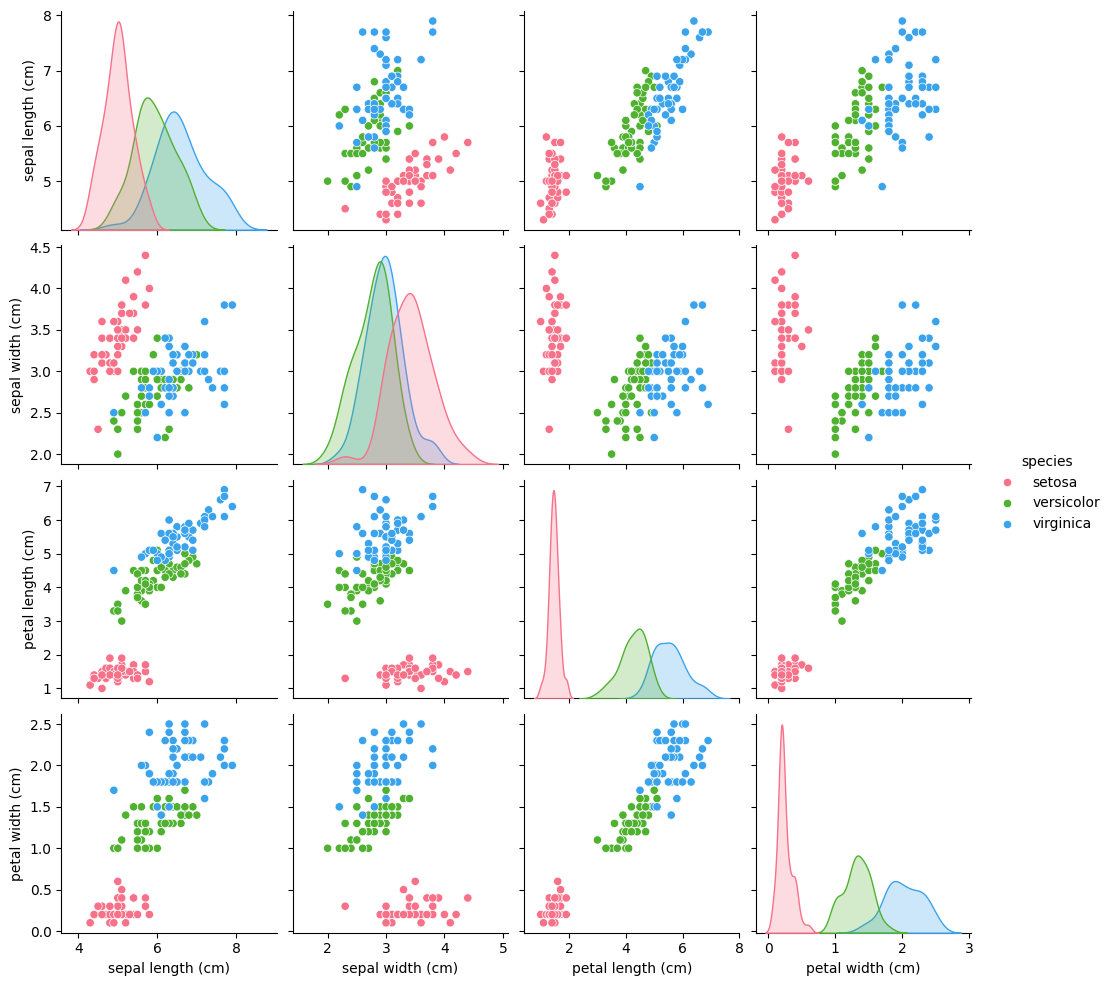

In [15]:
sns.pairplot( iris_data, hue='species', palette='husl' );

In [16]:
from sklearn.datasets import load_sample_image
# Load the Summer Palace photo
china = load_sample_image("china.jpg")
print(china.shape)

(427, 640, 3)


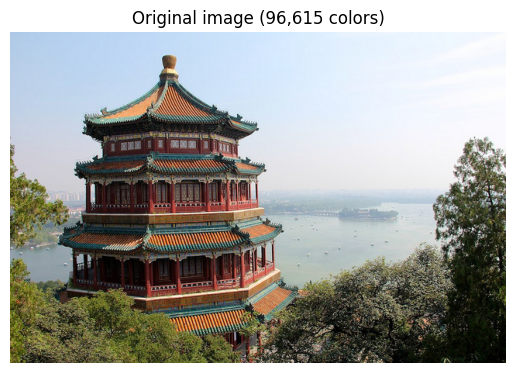

In [17]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

In [18]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))
print(image_array.shape)

(273280, 3)


### Fetching larger datasets

In [19]:
california_housing = datasets.fetch_california_housing()
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [20]:
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [21]:
from sklearn.datasets import fetch_openml
mice = fetch_openml(name='miceprotein', version=4)
mice.url

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_arff_parser.py:446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[col] = frame[col].cat.rename_categories(strip_single_quotes)


'https://www.openml.org/d/40966'

In [22]:
mice.data.shape

(1080, 77)

In [23]:
mice.target.shape

(1080,)

In [24]:
print(mice.DESCR)

**Author**: Clara Higuera, Katheleen J. Gardiner, Krzysztof J. Cios  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression) - 2015   
**Please cite**: Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. Th

In [25]:
mice.details

{'id': '40966',
 'name': 'MiceProtein',
 'version': '4',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2017-11-08T16:00:15',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/17928620/MiceProtein.arff',
 'parquet_url': 'https://data.openml.org/datasets/0004/40966/dataset_40966.pq',
 'file_id': '17928620',
 'default_target_attribute': 'class',
 'row_id_attribute': 'MouseID',
 'ignore_attribute': ['Genotype', 'Treatment', 'Behavior'],
 'tag': ['Biology',
  'Data Science',
  'Health',
  'OpenML-CC18',
  'Research',
  'study_135',
  'study_98',
  'study_99'],
 'visibility': 'public',
 'minio_url': 'https://data.openml.org/datasets/0004/40966/dataset_40966.pq',
 'status': 'active',
 'processing_date': '2018-10-04 00:49:58',
 'md5_checksum': '3c479a6885bfa0438971388283a1ce32'}

In [26]:
mice = fetch_openml(data_id=40966)
mice.details

{'id': '40966',
 'name': 'MiceProtein',
 'version': '4',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2017-11-08T16:00:15',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/17928620/MiceProtein.arff',
 'parquet_url': 'https://data.openml.org/datasets/0004/40966/dataset_40966.pq',
 'file_id': '17928620',
 'default_target_attribute': 'class',
 'row_id_attribute': 'MouseID',
 'ignore_attribute': ['Genotype', 'Treatment', 'Behavior'],
 'tag': ['Biology',
  'Data Science',
  'Health',
  'OpenML-CC18',
  'Research',
  'study_135',
  'study_98',
  'study_99'],
 'visibility': 'public',
 'minio_url': 'https://data.openml.org/datasets/0004/40966/dataset_40966.pq',
 'status': 'active',
 'processing_date': '2018-10-04 00:49:58',
 'md5_checksum': '3c479a6885bfa0438971388283a1ce32'}

### Generating synthetic datasets

In [27]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

In [30]:
gaussian_quantiles = datasets.make_gaussian_quantiles()
type(gaussian_quantiles), len(gaussian_quantiles)

(tuple, 2)

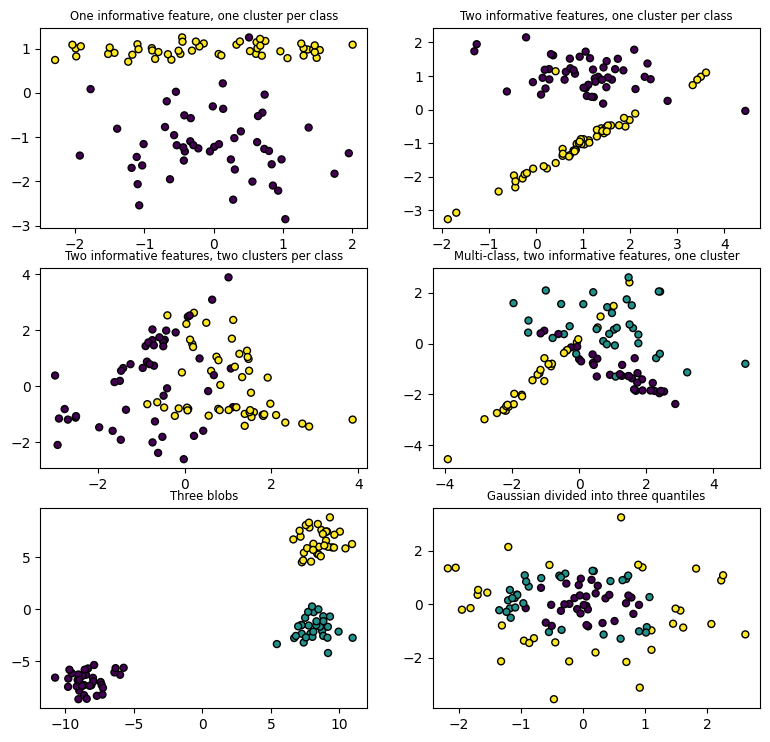

In [31]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(323)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(325)
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()

## Data Preprocessing

In [32]:
from sklearn import preprocessing

### `StandardScaler`

In [35]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)

In [36]:
print("Scaler:", scaler)
print("Mean of scaler: ", scaler.mean_)
print("Scale of scaler:", scaler.scale_)

Scaler: StandardScaler()
Mean of scaler:  [1.         0.         0.33333333]
Scale of scaler: [0.81649658 0.81649658 1.24721913]


### `MinMaxScaler`

In [37]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [38]:
X = np.array( [0, 0.5, 1, 1.5, 2, 100] )
X_scale = preprocessing.MinMaxScaler().fit_transform( X.reshape(-1,1) )
X_scale

array([[0.   ],
       [0.005],
       [0.01 ],
       [0.015],
       [0.02 ],
       [1.   ]])

### `OrdinalEncoder`

In [39]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc = preprocessing.OrdinalEncoder()
print( enc.fit(X) )
print( enc.categories_ )
print( enc.transform([['female', 'from US', 'uses Safari']]) )

OrdinalEncoder()
[array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]
[[0. 1. 1.]]


### `OneHotEncoder`

In [40]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']

In [41]:
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])

In [42]:
# Note that for there are missing categorical values for the 2nd and 3rd feature
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

In [43]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

## Feature extraction
Loading features from dicts

In [44]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

In [49]:
vec = DictVectorizer()
print( vec.fit_transform(measurements).toarray() )
# The method for getting feature names was renamed in scikit-learn 1.0
# Use get_feature_names_out instead of get_feature_names
print( vec.get_feature_names_out() )

[[ 1.  0.  0. 33.]
 [ 0.  1.  0. 12.]
 [ 0.  0.  1. 18.]]
['city=Dubai' 'city=London' 'city=San Francisco' 'temperature']


## Modeling and Learning

### `SGDClassifier`: [Maximum margin separating hyperplane](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_separating_hyperplane.html#sphx-glr-auto-examples-linear-model-plot-sgd-separating-hyperplane-py)

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [51]:
# create 500 separable points
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.60)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2 )

In [ ]:
# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=200, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict( X_test )
print( y_test, '\n' )
print( y_pred, '\n' )

[1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1] 

[1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1] 



In [ ]:
print( clf.score( X_test, y_test ) )

0.98


In [ ]:
print( clf.decision_function( X_test ))

[ 4.78991931  1.96561953 -3.35116609 -2.62050069 -2.17731509  2.58505343
 -2.97894413 -3.48898076  3.13258777  3.37190777 -2.13534788  2.41866663
 -2.94699927  0.08663922  3.45964063  2.317974    3.40022294  0.90940721
  3.63094623  1.72407669  2.53627158  4.66064355 -1.51719738 -2.67758145
 -3.07083186  3.88132745 -1.43053838 -1.85853295 -5.05459234 -2.09611094
 -2.59091466 -2.72798361 -2.97845999  3.89791398 -1.41496566  4.20587778
 -1.27439188 -2.69991844  5.22479463  4.45799367  4.30058985  5.0557434
 -4.38833505  3.37989784 -3.18865631 -3.52524897  4.63869244 -0.78738466
  2.63335401  3.40438441 -2.53184231  4.6060744  -2.82232345 -2.55239911
 -2.57644772  3.10030383 -2.43866451  4.01781369 -1.61436837 -4.23334135
  4.31859696 -0.51331368  3.91139544  2.64731875 -2.5152052   4.54217526
  3.55185762 -2.65447686 -4.05367913 -3.61034729 -3.1639512  -4.95536352
  5.4457088   3.04215088 -3.13587359 -3.32958299 -3.03457409 -3.17166527
 -3.39099417  3.06339391  3.92131107  4.11441994  4.

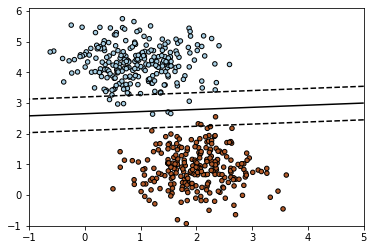

In [ ]:
# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()

### `KMeans`: k-means assumptions

In [ ]:
from sklearn.cluster import KMeans
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

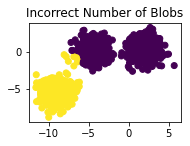

In [ ]:
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

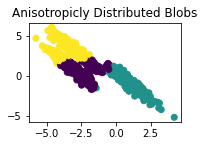

In [ ]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

Text(0.5, 1.0, 'Unequal Variance')

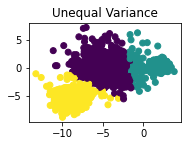

In [ ]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

Text(0.5, 1.0, 'Unevenly Sized Blobs')

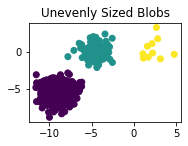

In [ ]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

In [ ]:
model = KMeans( n_clusters=3 )
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Another `KMeans` example on Iris dataset

In [ ]:
from matplotlib.colors import ListedColormap

r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207
cmap_light = ListedColormap( ['#FFAAAA', '#AAFFAA', '#AAAAFF'] )
cmap_bold1 = ListedColormap( [r_hex, g_hex, dt_hex] )
cmap_bold2 = ListedColormap( [r_hex, dt_hex, g_hex] )

%matplotlib inline

from sklearn.cluster import KMeans

In [ ]:
model = KMeans( n_clusters=3 )
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
X = iris.data[:,0:2]
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

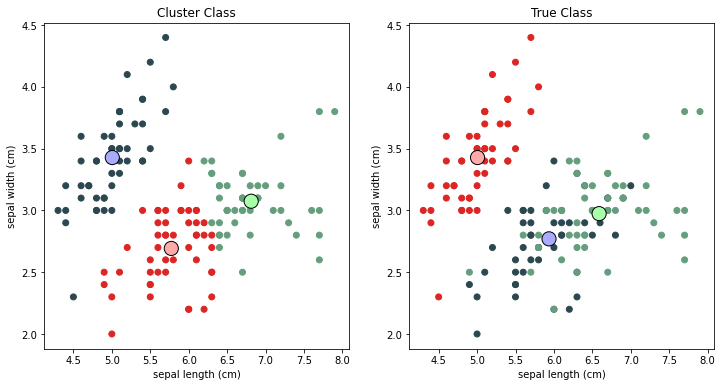

In [ ]:
centroid = model.cluster_centers_
label = iris.target
true_centroid = np.vstack((X[label == 0,:].mean(axis=0),
                           X[label == 1,:].mean(axis=0),
                           X[label == 2,:].mean(axis=0)))

plt.figure( figsize=(12,6) )
plt.subplot(1,2,1)
plt.scatter( X[:,0], X[:,1], c=model.labels_, cmap=cmap_bold1 )
plt.scatter( centroid[:, 0], centroid[:,1], marker='o', s=200, edgecolors='k', c=[0,1,2], cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Cluster Class')
plt.subplot(1,2,2)
plt.scatter( X[:,0], X[:,1], c=iris.target, cmap=cmap_bold2 )
plt.scatter( true_centroid[:,0], true_centroid[:,1], marker='o', s=200, edgecolors='k', c=[0,2,1], cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('True Class')
plt.show()

In [ ]:
print( model.cluster_centers_, '\n')
print( model.labels_, '\n' )
print( model.inertia_, '\n')
print( iris.target )

[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.428     ]] 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0] 

37.05070212765958 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( iris['data'], iris['target'], test_size=0.2 )

model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
idx_pred = model.predict(X_test)

print( idx_pred )
print( y_test )

[1 0 0 1 0 0 2 0 1 1 2 0 0 1 0 2 0 1 2 2 2 0 2 1 1 0 1 0 2 1]
[1 0 0 1 0 0 2 0 1 1 2 0 0 1 0 2 0 1 1 2 2 0 2 2 1 0 2 0 2 1]


In [ ]:
model.score( X_test )

-16.423503773213838

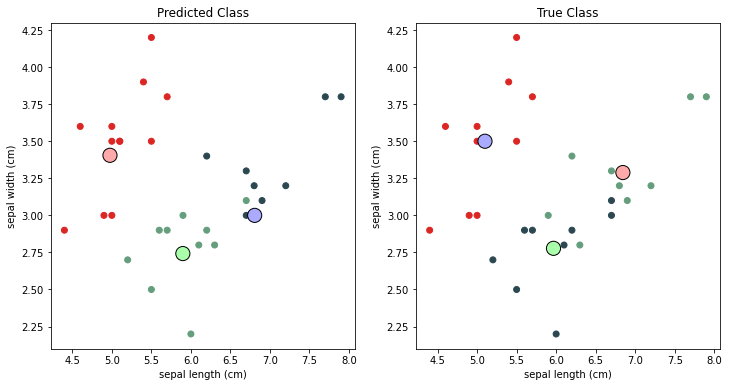

In [ ]:
centroid = model.cluster_centers_
true_centroid = np.vstack((X_test[y_test == 0,0:2].mean(axis=0),
                           X_test[y_test == 1,0:2].mean(axis=0),
                           X_test[y_test == 2,0:2].mean(axis=0)))

plt.figure( figsize=(12,6) )

plt.subplot(1,2,1)
plt.scatter( X_test[:,0], X_test[:,1], c=idx_pred, cmap=cmap_bold1 )
plt.scatter( centroid[:,0], centroid[:,1], marker='o', s=200, edgecolors='k', c=[0,1,2], cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Predicted Class')

plt.subplot(1,2,2)
plt.scatter( X_test[:,0], X_test[:,1], c=y_test, cmap=cmap_bold2 )
plt.scatter( true_centroid[:,0], true_centroid[:,1], marker='o', s=200, edgecolors='k', c=[2,1,0], cmap=cmap_light )
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('True Class')
plt.show()

### RandomForest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( iris['data'], iris['target'], test_size=0.2 )

RF = RandomForestClassifier( n_estimators=4, max_depth=5 )
RF.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print( RF.n_estimators )
RF.estimators_

4


[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=72001030, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=2108227554, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_feature

In [ ]:
print ( "RF - Accuracy (Train):  %.4g" % metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "RF - Accuracy (Test):  %.4g" %  metrics.accuracy_score(y_test, RF.predict(X_test)) )

RF - Accuracy (Train):  0.9833
RF - Accuracy (Test):  0.8333


### Ensemble's Voting classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
LR = LogisticRegression( solver="lbfgs", multi_class="multinomial")
RF = RandomForestClassifier( n_estimators=5 )
GNB = GaussianNB()

In [ ]:
Ensemble = VotingClassifier( estimators=[('lr', LR), ('rf', RF), ('gnb', GNB)], voting='hard' )
Ensemble.fit( X_train, y_train )

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=...
                                        

In [ ]:
print( len(Ensemble.estimators_) )
Ensemble.estimators_

3


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=5,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09)]

In [ ]:
LR.fit( X_train, y_train )
RF.fit( X_train, y_train )
GNB.fit( X_train, y_train )

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print( "LR - Accuracy (Train): %.5g" % metrics.accuracy_score(y_train, LR.predict(X_train)))
print( "RF - Accuracy (Train): %.5g" % metrics.accuracy_score(y_train, RF.predict(X_train)))
print( "GNB - Accuracy (Train): %.5g" % metrics.accuracy_score(y_train, GNB.predict(X_train)))
print( "Ensemble - Accuracy (Train): %.5g" % metrics.accuracy_score(y_train, Ensemble.predict(X_train)))

print( "LR - Accuracy (Test): %.5g" % metrics.accuracy_score(y_test, LR.predict(X_test)))
print( "RF - Accuracy (Test): %.5g" % metrics.accuracy_score(y_test, RF.predict(X_test)))
print( "GNB - Accuracy (Test): %.5g" % metrics.accuracy_score(y_test, GNB.predict(X_test)))
print( "Ensemble - Accuracy (Test): %.5g" % metrics.accuracy_score(y_test, Ensemble.predict(X_test)))

LR - Accuracy (Train): 0.96667
RF - Accuracy (Train): 1
GNB - Accuracy (Train): 0.95833
Ensemble - Accuracy (Train): 0.98333
LR - Accuracy (Test): 0.93333
RF - Accuracy (Test): 0.96667
GNB - Accuracy (Test): 0.96667
Ensemble - Accuracy (Test): 0.96667


### Pipeline Example

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
# The pipeline can be used as any other estimator and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pipe.score(X_test, y_test)

0.84

### FeatureUnion Example

In [ ]:
X = [[0., 1., 3], [2., 2., 5]]

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import FeatureUnion

In [ ]:
pca = PCA(n_components=1)
pca.fit_transform(X)

array([[ 1.5],
       [-1.5]])

In [ ]:
svd = TruncatedSVD(n_components=2)
svd.fit_transform(X)

array([[ 3.03954967,  0.87243213],
       [ 5.72586357, -0.46312679]])

In [ ]:
union = FeatureUnion([("pca", pca),
                      ("svd", svd)])
union.fit_transform(X)

array([[ 1.5       ,  3.03954967,  0.87243213],
       [-1.5       ,  5.72586357, -0.46312679]])

### RandomizedSearchCV example

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
iris = datasets.load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])

In [ ]:
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)


{'C': 2.195254015709299, 'penalty': 'l1'}

In [ ]:
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Best parameters:  {'C': 2.195254015709299, 'penalty': 'l1'}
Best score:  0.9800000000000001


### `cross_validate` example

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

In [ ]:
cv_results = cross_validate(lasso, X, y, cv=3)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [ ]:
cv_results['test_score']

array([0.33150734, 0.08022311, 0.03531764])

In [ ]:
scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])

[-3635.51152303 -3573.34242148 -6114.78229547]
[0.28010158 0.39088426 0.22784852]


## Saving and Restoring a trained model

In [ ]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y= datasets.load_iris(return_X_y=True)
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### `pickle` to a string

In [ ]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [ ]:
y[0]

0

### `pickle` to the disk

In [ ]:
import pickle
# save the classifier
with open('my_dumped_classifier.pkl', 'wb') as fid:
    pickle.dump(clf, fid)
with open('my_dumped_classifier.pkl', 'rb') as fid:
    clf4 = pickle.load(fid)
    print(clf4.predict(X[0:1]))

[0]


In [ ]:
from joblib import dump, load
dump(clf, 'filename.joblib')
clf3 = load('filename.joblib')
clf3.predict(X[0:1])

array([0])